# K-Nearest Neighbour (KNN)

### 1. Classification

I have dataset with independent features f1, f2 and output feature y.

1. We have to initialize K value. K can be any number between 1 to infinity. K is our hyperparameter.

2. We find the K-nearest neighbour for the test data. Find the 5 nearest points based on the distance.

3. From those 5 points, how many neighbours belongs to 0 and 1 categories.

4. The output will be the maximum number of neighbour belonging to the particular category.

5. We can use two types of distance formul. i) Euclidean Distance, ii) Manhattan Distance

### Euclidean Distance

The Euclidean distance between two points $( P(x_1, y_1) )$ and $( Q(x_2, y_2) )$ is given by:

$$
d_{\text{euclidean}} = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}
$$

### Manhattan Distance

The Manhattan distance between two points $( P(x_1, y_1) )$ and $( Q(x_2, y_2) )$ is given by:

$
d_{\text{manhattan}} = |x_2 - x_1| + |y_2 - y_1|
$


### 2. Regression

In regression, we select the value of k and the output will be the average of the k-nearest neighbours

# Variants of KNN

The problem with KNN is that in order to find out the K nearest neighbours, we have to calculate the distance between all points, then we can find out the k-nearest neighbours that has time complexity of O(n)


### KD Tree

We will create a KD tree that is in the form of binary tree. It means we reduced number of searches. We have to find the median for feature f1, and f2.

The median of f1 = 6 (x-axis).

The median of f2 = 3.5. (y-axis).

Backtracking is also used to find out the next neares points. We are also decreasing the time complexity.


### Ball Tree

We create a group of data points. Then we combine the neareast groups into single group.



# KNN Classifier and Regressor

In [ ]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#generating data
from sklearn.datasets import make_classification
X, y = make_classification(n_samples = 1000, n_features = 3, n_classes = 2,n_redundant=1, random_state = 42)

In [ ]:
# printing X
X

array([[ 2.48547786,  2.39963589, -1.46526917],
       [ 2.20403962, -1.06965652,  0.00979545],
       [-0.5726534 , -0.75494788,  0.42032991],
       ...,
       [-0.41608875,  0.46668963, -0.11024494],
       [-1.57936997,  2.48498245, -0.71060102],
       [-0.43277356,  0.89093028, -0.28069604]])

In [ ]:
#splitting data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state  =42)

In [ ]:
#Importing kn classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 5, algorithm="auto")

In [ ]:
#fitting knn classifier on training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
#making predictions on test data
knn_pred  = knn.predict(X_test)

In [ ]:
#evaluating performance of knn classifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(confusion_matrix(y_test, knn_pred))
print("Accuracy:",round(accuracy_score(y_test, knn_pred), 5))
print(classification_report(y_test, knn_pred))

[[156   9]
 [ 18 147]]
Accuracy: 0.91818
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       165
           1       0.94      0.89      0.92       165

    accuracy                           0.92       330
   macro avg       0.92      0.92      0.92       330
weighted avg       0.92      0.92      0.92       330



In [ ]:
#findining optimal value of k
neighbours = list(range(1,20))
accuracy = []
for k in neighbours:
    knn = KNeighborsClassifier(n_neighbors=k, algorithm="auto")
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy.append(round(accuracy_score(y_test, y_pred), 5))
print(accuracy)

[0.89394, 0.90909, 0.91818, 0.91818, 0.91818, 0.91515, 0.92121, 0.91818, 0.91818, 0.90909, 0.90606, 0.90303, 0.9, 0.89697, 0.90303, 0.9, 0.90303, 0.89394, 0.9]


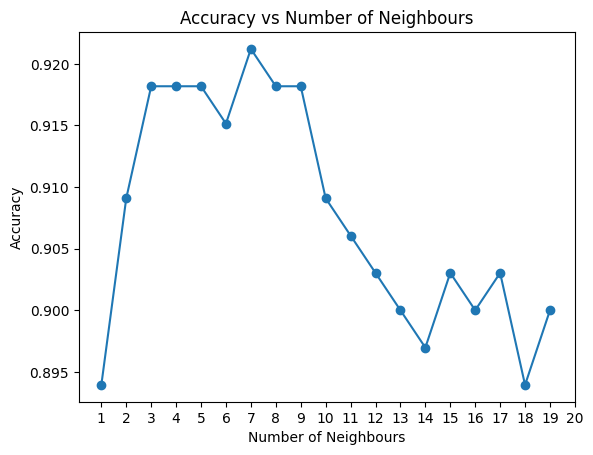

In [ ]:
#visualizing accuracy by Neighours
plt.plot(neighbours, accuracy, marker = "o")
plt.title("Accuracy vs Number of Neighbours")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of Neighbours")
plt.ylabel("Accuracy")
plt.show()

# KNN Regressor

In [ ]:
#generating regression data
from sklearn.datasets import make_regression
X, y = make_regression(n_samples = 1000, n_features = 2, noise = 10, random_state = 42)

In [ ]:
#printing X
X

array([[-0.16711808,  0.14671369],
       [-0.02090159,  0.11732738],
       [ 0.15041891,  0.364961  ],
       ...,
       [ 0.30263547, -0.75427585],
       [ 0.38193545,  0.43004165],
       [ 0.07736831, -0.8612842 ]])

In [ ]:
#printing y
y

array([-1.49969499e+01, -1.26780889e+01,  1.77754545e+01,  6.66146467e+00,
       -1.41955300e+01, -2.52448482e+01, -3.92316263e+01, -5.20180382e+01,
        5.76368853e+00, -5.01186029e+01,  3.68932300e+01, -5.73879093e+01,
       -1.43015904e+01, -3.14639243e+01,  3.73110627e+01,  1.56178696e+01,
       -6.66080007e+00, -4.89229382e+01, -9.58772599e+00,  8.53715394e+01,
        1.66537460e+01, -3.41293946e+01, -3.72378063e+01, -4.87281315e+01,
       -5.51790322e+01, -3.55366169e+01, -3.72747912e+00,  7.34218222e+01,
        1.01718119e+02, -1.90116475e+01, -3.43901341e+01, -9.62943086e+00,
        1.16658030e+01,  2.08905862e+01, -1.70900105e+01, -1.50447947e+01,
        4.68228521e+01, -1.89552845e+01,  5.71898896e+01, -5.48067724e+01,
       -5.16310769e+01, -8.08939793e+00,  6.06663511e+01,  3.55254095e+01,
        1.04233163e+01, -4.30586696e+01,  1.12998389e+00,  2.31342762e+01,
       -6.13582958e+00,  2.60353115e+01,  5.87540393e+01,  2.13374470e+01,
       -4.73477124e+01,  

In [ ]:
#splitting dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)

In [ ]:
#importing and initialize knn regressor
from sklearn.neighbors import KNeighborsRegressor
knn_r = KNeighborsRegressor(n_neighbors=6, algorithm="auto")


In [ ]:
#fitting knn regressor on training data
knn_r.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=6)

In [ ]:
#making predictions on test data
y_pred = knn_r.predict(X_test)

In [ ]:
#evalutaing knn regressor performance
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.9189275159979495
9.009462452972217
127.45860414317289
